# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
    - **Task 2: Classification** Classify for review score
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


# <span style='color:blue'>Data Preparation (15 points total)</span>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when convertin to/ from CSV file format</span>
*[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [1]:
# set up environment and load dataset

import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import copy

# set working directory
os.chdir(r"C:\Users\justi\GitHub\olist\data")
print('Current working directory:',os.getcwd())

# Let's get the data
olist_download = pd.read_csv('olist_lab1_data.csv')  
print(olist_download.shape)
olist_download.head()

Current working directory: C:\Users\justi\GitHub\olist\data
(114067, 47)


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [2]:
olist = copy.deepcopy(olist_download) # so now we have a back up of the original dataset

## <span style='color:red'>Define class variable representations (int,float, onehot, etc)</span>

In [3]:
olist.info() #initial variable Dtypes - we will need to fix these!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [4]:
# clean up attributes in the relaoded dataset from lab 1

#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['customer_city','customer_state','customer_zip_code_prefix','seller_zip_code_prefix',
                'seller_city','seller_state','product_category_english','review_id','review_comment_title',
                'review_comment_message','payment_type','order_item_id', 'product_id','seller_id','order_id', 
                'customer_id','customer_unique_id','delivery_est_discrepancy_range','purchase_month','purchase_wk_day',
                'review_score_class'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [5]:
# use the "astype" function to change the variable type

olist[cat_features] = olist.copy()[cat_features].astype('category')

olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)


In [6]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")

In [7]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

In [8]:
# 4 possible outcomes for payment type


olist.payment_type.value_counts()

credit_card    84163
boleto         22203
voucher         6068
debit_card      1633
Name: payment_type, dtype: int64

In [9]:
print(olist.duplicated().sum())

0


In [10]:
import altair as alt

sa = olist.sample(n=1000, random_state=42)
alt.Chart(sa).mark_circle().encode(
    alt.X('price'),
    alt.Y('freight_value'),
    alt.Color('payment_type')
)

alt.Chart(...)

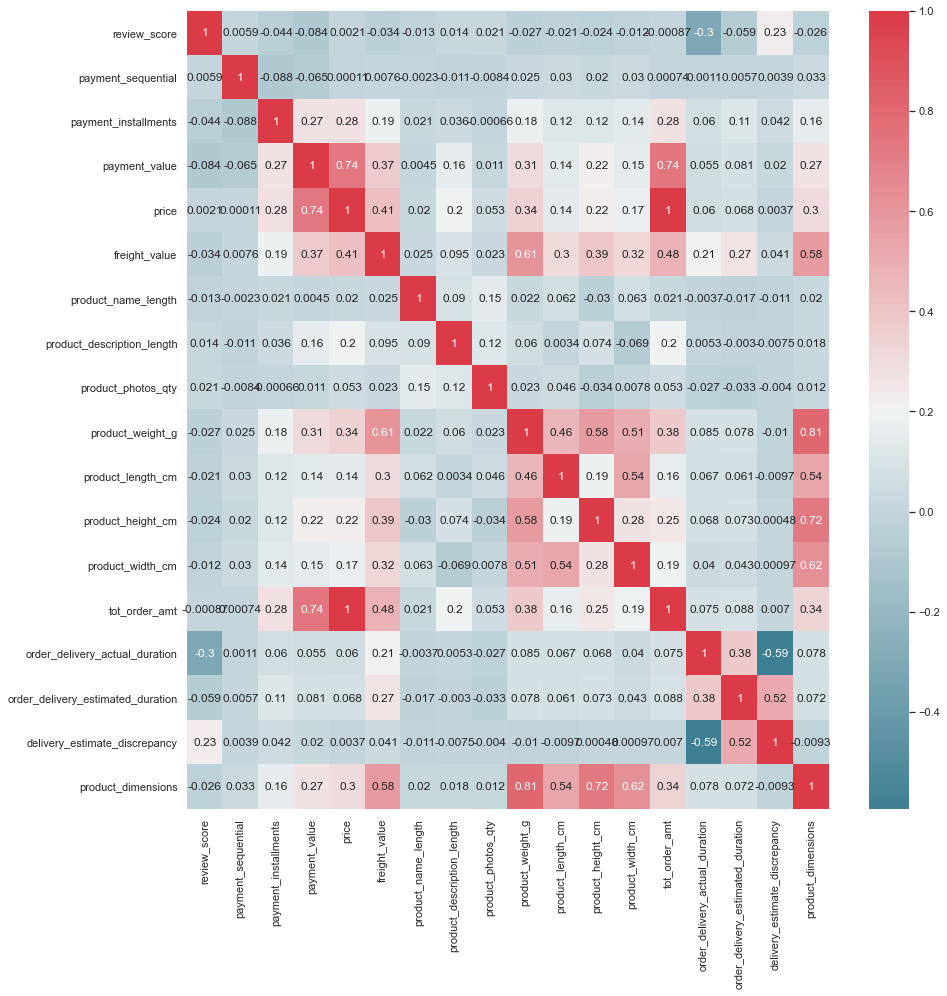

In [11]:
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [12]:
# let's remove nominal values (anything with the label x_id) and anything with possible NaNs such as the comments
olist = olist.drop(columns = ['review_comment_title','review_comment_message','review_id','order_id','customer_id',
                              'order_item_id','product_id','seller_id','customer_unique_id','product_length_cm',
                              'product_width_cm','product_height_cm','payment_value','delivery_estimate_discrepancy',
                             'delivery_est_discrepancy_range','order_delivery_actual_duration','order_delivery_estimated_duration'],
                   axis=1) 


In [13]:
print(olist.duplicated().sum())
# looks like removing those columns made it look like we have duplicates, to keep from overfitting the model
# we  will go ahead and remove those
olist.drop_duplicates(inplace=True)
print(olist.duplicated().sum())

10324
0


In [14]:
olist[['order_approved_at','order_delivered_customer_date','price']].duplicated

<bound method DataFrame.duplicated of          order_approved_at order_delivered_customer_date   price
0      2018-04-25 22:15:09           2018-05-09 17:36:51   79.80
1      2018-06-26 11:18:58           2018-06-29 20:32:09   17.00
2      2017-12-14 09:52:34           2017-12-18 17:24:41   56.99
3      2017-12-06 12:13:20           2017-12-21 01:35:51   89.90
4      2017-12-06 12:13:20           2017-12-21 01:35:51   89.90
...                    ...                           ...     ...
114062 2018-05-16 12:39:20           2018-05-22 17:28:28  179.80
114063 2018-03-10 03:55:25           2018-03-16 13:09:51  297.00
114064 2017-08-18 10:04:56           2017-08-23 22:25:56   79.00
114065 2018-08-07 23:45:00           2018-08-21 22:41:46  349.00
114066 2017-12-06 02:50:09           2018-02-05 14:59:09  169.90

[103743 rows x 3 columns]>

In [15]:
# remove the response variable - payment_method
olist_y = copy.deepcopy(olist.payment_type)
olist_X = copy.deepcopy(olist.drop(columns=['payment_type']))
print(olist_y.value_counts())

print('\n=====================\nolist_X\n=====================\n')
olist_X.info()

credit_card    76836
boleto         19703
voucher         5677
debit_card      1527
Name: payment_type, dtype: int64

olist_X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103743 entries, 0 to 114066
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       103743 non-null  datetime64[ns]
 1   order_approved_at              103743 non-null  datetime64[ns]
 2   order_delivered_carrier_date   103743 non-null  datetime64[ns]
 3   order_delivered_customer_date  103743 non-null  datetime64[ns]
 4   order_estimated_delivery_date  103743 non-null  datetime64[ns]
 5   customer_zip_code_prefix       103743 non-null  category      
 6   customer_city                  103743 non-null  category      
 7   customer_state                 103743 non-null  category      
 8   review_score                   103743 non-null  float64       
 9   review_cr

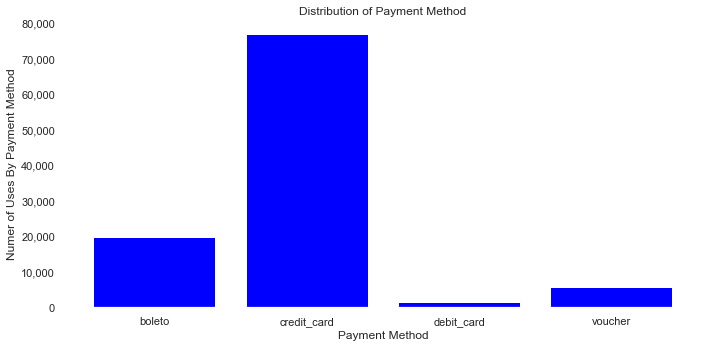

In [16]:
# plot the distribution of y

f, ax = plt.subplots(figsize=(10,5), tight_layout=True)

labels, counts = np.unique(olist_y, return_counts=True)
ax.bar(labels, counts, align='center', color='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to the yaxis ticks
ax.set_facecolor('white')

plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Numer of Uses By Payment Method')

plt.show()

# note the uneven distribution of payment trypes, with a strong preference to use credit cards 
# - we will need to weight our model results

In [17]:
# before we get started, we need to remove fields with NaN - as in the comment title and message fields
X = copy.deepcopy(olist_X)
y = copy.deepcopy(olist_y)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103743 entries, 0 to 114066
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       103743 non-null  datetime64[ns]
 1   order_approved_at              103743 non-null  datetime64[ns]
 2   order_delivered_carrier_date   103743 non-null  datetime64[ns]
 3   order_delivered_customer_date  103743 non-null  datetime64[ns]
 4   order_estimated_delivery_date  103743 non-null  datetime64[ns]
 5   customer_zip_code_prefix       103743 non-null  category      
 6   customer_city                  103743 non-null  category      
 7   customer_state                 103743 non-null  category      
 8   review_score                   103743 non-null  float64       
 9   review_creation_date           103743 non-null  datetime64[ns]
 10  review_answer_timestamp        103743 non-null  datetime64[ns]
 11  

In [18]:
bad_seed = X[X.product_weight_g.isna()].index.values.tolist()[0]
print('Row Index:',bad_seed, 'has NaN\'s')
X = X.drop(index = [bad_seed], axis = 0)
y = y.drop(index = [bad_seed], axis = 0)

X.isna().any()


Row Index: 40711 has NaN's


order_purchase_timestamp         False
order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
order_estimated_delivery_date    False
customer_zip_code_prefix         False
customer_city                    False
customer_state                   False
review_score                     False
review_creation_date             False
review_answer_timestamp          False
payment_sequential               False
payment_installments             False
shipping_limit_date              False
price                            False
freight_value                    False
product_name_length              False
product_description_length       False
product_photos_qty               False
product_weight_g                 False
product_category_english         False
seller_zip_code_prefix           False
seller_city                      False
seller_state                     False
tot_order_amt                    False
purchase_wk_day          

In [19]:
print(X.shape, y.shape)

(103742, 29) (103742,)


##### StratifiedShuffleSplit Train/Test
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit#sklearn.model_selection.StratifiedShuffleSplit

In [20]:
# train/ test split
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10,test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!

print(cv)
print(cv.get_n_splits(X,y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(X,y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    X_train, X_test = X.iloc[trainidx], X.iloc[testidx] 
    y_train, y_test = y.iloc[trainidx], y.iloc[testidx]


StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7)
10


In [21]:
print('Let\'s take a look at how our training/ test splits came out:')
print(cv,'\nn_splits:',cv.get_n_splits(X,y))
print('X_train.shape:',X_train.shape, 'X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape, 'y_test.shape:',y_test.shape)


Let's take a look at how our training/ test splits came out:
StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7) 
n_splits: 10
X_train.shape: (72619, 29) X_test.shape: (31123, 29)
y_train.shape: (72619,) y_test.shape: (31123,)


In [22]:
X_train.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,customer_city,customer_state,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class
count,72619,72619,72619,72619,72619.0,72619,72619,72619,72619,72619
unique,13723,3684,27,73,2030.0,568,22,7,12,3
top,22790,sao paulo,SP,bed_bath_table,14940.0,sao paulo,SP,Monday,August,good
freq,102,11330,30624,7527,5264.0,18019,51649,11783,7955,56198


In [23]:
X_test.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,customer_city,customer_state,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class
count,31123,31123,31123,31123,31123.0,31123,31123,31123,31123,31123
unique,10544,2724,27,72,1723.0,489,21,7,12,3
top,29101,sao paulo,SP,bed_bath_table,14940.0,sao paulo,SP,Monday,August,good
freq,41,4931,13046,3257,2269.0,7657,22114,5070,3393,24307


##### <span style='color:red'><b>SelectKBest Feature Selection</b></span>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#

In [24]:
# use SelectKBest from Sklearn to get an idea of best features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# scale numerical variables in place
scaler = StandardScaler(copy=False) #this way we can just replace the raw data with the scaled data
scaler.fit_transform(X_train.select_dtypes('float64','int64'))
scaler.fit_transform(X_test.select_dtypes('float64','int64'))


# convert categorical variables into numeric values
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1) 

enc.fit(X_train) # 
X_train_num = enc.transform(X_train)
X_test_num = enc.transform(X_test)

    
# convert the resonse variables into numeric values using LabelEncoder 
le = LabelEncoder()
le.fit(y_train)
y_train_num = le.transform(y_train)
y_test_num = le.transform(y_test)
    
# build the feature selection function using SelectKBest
# Note here: i ran this and determined that I wanted k=16 total
# after running this the first time, I decided that I wanted to keep the top 11 features to make sure and include
# payment_sequential since that just feel intuitively important when determining how a customer will pay
skb = SelectKBest(chi2, k=10)  
skb.fit(X_train_num,y_train_num)
X_train_feats = skb.transform(X_train_num)
X_test_feats = skb.transform(X_test_num)


# create a dataframe matching feature names to chi^2 scores
cols = np.array(X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_, 'p_values': skb.pvalues_})

# sort by score values in descending order
feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(feat_scores)


                          feature      score  p_values
0        order_purchase_timestamp 5106536.22      0.00
1   order_delivered_customer_date 4951218.06      0.00
2         review_answer_timestamp 4862630.90      0.00
3             shipping_limit_date 4684714.59      0.00
4               order_approved_at 4517226.56      0.00
5    order_delivered_carrier_date 4060282.04      0.00
6                   tot_order_amt 1994911.24      0.00
7                           price  361777.13      0.00
8        customer_zip_code_prefix  250812.87      0.00
9              payment_sequential  106147.66      0.00
10             product_dimensions   60492.14      0.00
11               product_weight_g   33675.06      0.00
12           payment_installments   31634.61      0.00
13           review_creation_date   22661.71      0.00
14                  freight_value   21158.04      0.00
15  order_estimated_delivery_date   15978.46      0.00
16     product_description_length   11285.73      0.00
17        

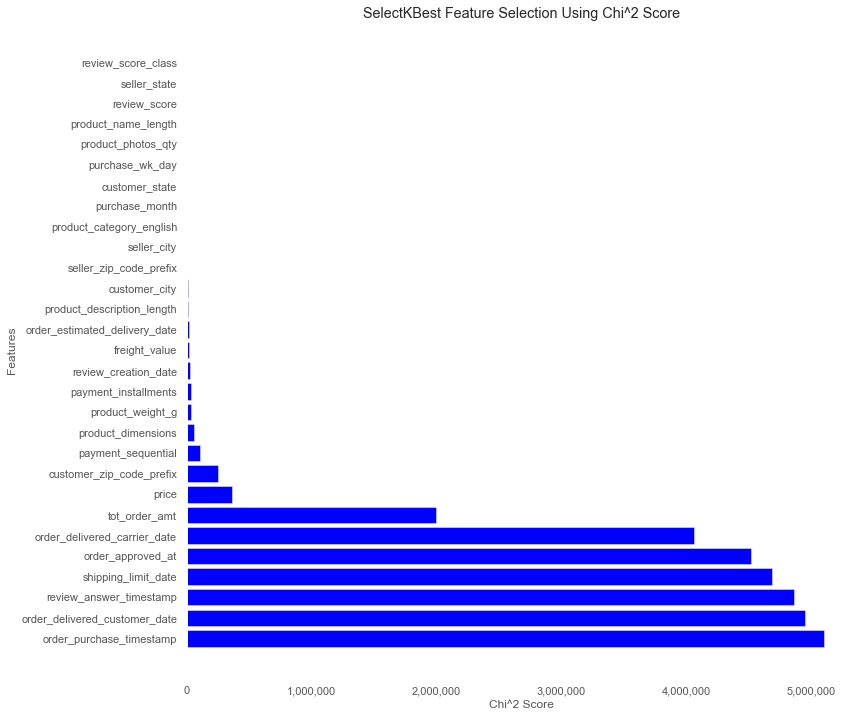

In [25]:
# let's also plot the scores to get a visual sense of what features are deemed most important
from matplotlib import pyplot

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))

ft = feat_scores.feature
width = feat_scores.score

ax.barh(ft, width=width, align='center', color='blue')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add commas in the x axis numbers
ax.set_facecolor('white')
ax.set_yticks(ft)
ax.set_yticklabels(ft)

plt.title('SelectKBest Feature Selection Using Chi^2 Score')
plt.ylabel('Features')
plt.xlabel('Chi^2 Score')
plt.show()



#Note I want to keep the top 10, so we will rerun this using k=15 to get our X_train_feats/ X_test_feats with 10 features

# <span style='color:blue'>Data Preparation  - Summary (15 points total)</span>
## <u>Categorizing How a Customer Will Pay For an Order from Olist</u>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). 
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when converting to/ from CSV file format</span>
    - <span style='color:blue'>Defined class variables based on the classes used and determined in Lab 1.</span>
    - <span style='color:blue'>StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,train_size=0.7) was used to split the training and test data using in order to use the SelectKBest feature selection to prevent data leakage. Source: https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after</span>
    - <span style='color:blue'>Since we don't plan to use logistic regression for determining how someone is going to pay, we did not one-hot encode any variables for this section.</span>
    - <span style='color:blue'>We did use scikit learn's StandardScaler, OrdinalEncoder and LabelEncoder in order to utilize scikit learn's SelectKBest function for feature reduction</span>   
 - Full Feature List
| Feature Name | Feature Description |
| :------------ | :------------------- |
| customer_city | customer city name |
| customer_state | customer state name |
| customer_zip_code_prefix | first five digits of customer zip code |
| freight_value | item freight value (if an order has more than one item, the freight value is split between the items) |
| order_approved_at | payment approval timestamp  |
| order_delivered_carrier_date | order posting timestamp when it was handed to the logistic partner  |
| order_delivered_customer_date | actual order delivery date to the customer  |
| order_estimated_delivery_date | estimated delivery date provided to thecustomer at the time of purchase initiation |
| order_purchase_timestamp | purchase initiation timestamp |
| payment_installments | number of payment installments by customer |
| payment_sequential | number of payment methods used by the customer |
| price | item price |
| product_category_english | product category name in English |
| product_description_length | number of characters extracted from the product description |
| product_dimensions | produict length x width x height |
| product_name_length | number of characters extracted from the product name |
| product_photos_qty | number of product photos published |
| product_weight_g | product weight measured in grams |
| purchase_month | name of month |
| purchase_wk_day | name of day |
| review_answer_timestamp | satisfaction survey answer timestamp |
| review_creation_date | date satisfaction survey sent to customer |
| review_score | 1 to 5 rating given by the customer on a satisfaction survey |
| review_score_class | classes = [good, bad, fair ] |
| seller_city | seller city name |
| seller_state | seller state name |
| seller_zip_code_prefix | first five digits of seller zip code |
| shipping_limit_date | seller shipping limit date for handing the order off to the logistic partner |
| tot_order_amt | price + freight_value |

* Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.  
    - <span style='color:blue'> For initial dimensionality reduction we removed nominal values (anything with the label x_id) and anything with possible NaNs such as the comments. We also removed highly correlated values such as weight, length and height that were all use to form the product_dimensions feature in Lab 1, payment_value that is highly correlated with tot_order_amt and price and delivery_estimate_discrepency since that was a variable created in Lab 1 for so data analysis.</span>
    - <span style='color:blue'>We utilized scikit learn's SelectKBest for feature selection and determined the best k was about 16 features, we could've gone more or lesss, in fact there was a big dropoff in the chi^2 score between the 14th and 15th feature, but the 16th feaure is called payment_installments and that just intuitively feels like something that affects what payment method a customer is going to use</span>
    - Reduced Feature List
| Feature Name |
| :--- |
|  order_purchase_timestamp  |  
|  order_delivered_customer_date  |  
|  review_answer_timestamp  |  
|  shipping_limit_date  |  
|  order_approved_at  |  
|  order_delivered_carrier_date  |  
|  tot_order_amt  |  
|  price  |  
|  customer_zip_code_prefix  |  
|  payment_sequential  |  
|  product_dimensions  |  
|  product_weight_g  |  
|  payment_installments  |  
    
* [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).<br>
    - <span style='color:blue'>dtypes: category(4), datetime64[ns](6), float64(6)</span><br>
    - <span style='color:blue'>no new variables were created for this categorization exercise</span>



# Modeling and Evaluation (70 points total)
* [10 points] 
    - Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). 
    - Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
    - <span style='color:blue'> Since we have an unbalanced class distribution for payment method with a strong preference for credit cards and very low preference for customers to use debit cards, we should use the F-measure to find the best balance between precision and recall vs Accuracy that puts more importance on true positives and true negatives. SOURCE:https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/  <span>
* [10 points] 
    - Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). 
    - <span style='color:blue'> We will split our data using Stratified 10-fold cross validation in an attempt to give the model the best chance to fit the data and work with data it has not seeen before. We will also seach for the best value of K nearest neighbors using a for loop.
    </span>
    - Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* [20 points] Create <span style="color:blue"> **three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two).**</span> Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### <span style='color:blue'>Model Selection KNN with reduced features using SelectKBest</span>
- KNN
- Naive Bayes
- Random Forest

In [26]:
X_train_feats.shape, y_train_num.shape, X_test_feats.shape, y_test_num.shape

((72619, 10), (72619,), (31123, 10), (31123,))

### <span style='color:blue'>Model Selection KNN with reduced features using Cross Validation</span>
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import random
import math

cv = StratifiedShuffleSplit(n_splits=10,test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!


# generate some values of K
random_k = random.sample(range(50,200), 7)
purpose_k = list(range(1,28,7))
k_list = purpose_k + random_k + [round(math.sqrt(len(X_train)))] # sqrt(N) is considered the best value of K
k_list.sort()
print('List of n_neighbors to test: %s' %(k_list))

# calculate f-measures
f_score_u = []
f_score_d = []
for k in k_list:
    percent_complete = k_list.index(k)/len(k_list)*100
    print(format(percent_complete, "^03.1f"),'% complete and is now testing k =', k)
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean', n_jobs=-1)
    scores = cross_val_score(knn, X_train_feats, y_train_num, cv = cv, scoring='f1_weighted')
    f_score_u.append(scores.mean())
    
    knn1 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', n_jobs=-1)
    scores1 = cross_val_score(knn1, X_train_feats, y_train_num, cv = cv, scoring='f1_weighted')
    f_score_d.append(scores1.mean())
     


List of n_neighbors to test: [1, 8, 15, 22, 50, 62, 64, 81, 107, 128, 137, 269]
0.0 % complete and is now testing k = 1
8.3 % complete and is now testing k = 8
16.7 % complete and is now testing k = 15
25.0 % complete and is now testing k = 22
33.3 % complete and is now testing k = 50
41.7 % complete and is now testing k = 62
50.0 % complete and is now testing k = 64
58.3 % complete and is now testing k = 81
66.7 % complete and is now testing k = 107
75.0 % complete and is now testing k = 128
83.3 % complete and is now testing k = 137
91.7 % complete and is now testing k = 269


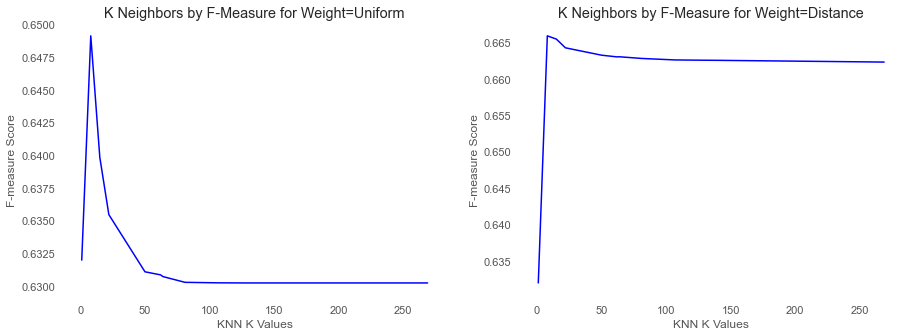


Results with Weight = Uniform
    K value  F-Measure
0         1       0.63
1         8       0.65
2        15       0.64
3        22       0.64
4        50       0.63
5        62       0.63
6        64       0.63
7        81       0.63
8       107       0.63
9       128       0.63
10      137       0.63
11      269       0.63

The best f1_measure with weight=uniform is: 0.649143 with 8 neighbors


Results with Weight = Distance
    K value  F-Measure
0         1       0.63
1         8       0.67
2        15       0.67
3        22       0.66
4        50       0.66
5        62       0.66
6        64       0.66
7        81       0.66
8       107       0.66
9       128       0.66
10      137       0.66
11      269       0.66

The best f1_measure with weight=distance is: 0.665904 with 8 neighbors

The better weight appears to be 'distance' with an f1_score of 0.665904 vs the 'uniform' f1_score of 0.649143


In [28]:
# plot the results
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(k_list, f_score_u, color='blue')
ax[0].set_facecolor('white')
ax[0].set_title('K Neighbors by F-Measure for Weight=Uniform')
ax[0].set_xlabel('KNN K Values')
ax[0].set_ylabel('F-measure Score')

ax[1].plot(k_list, f_score_d, color='blue')
ax[1].set_facecolor('white')
ax[1].set_title('K Neighbors by F-Measure for Weight=Distance')
ax[1].set_xlabel('KNN K Values')
ax[1].set_ylabel('F-measure Score')
plt.show()

print('========================================\n')
m_f1_u = max(f_score_u)
test_results_u = pd.DataFrame({"K value": k_list, "F-Measure": f_score_u})

m_f1_d = max(f_score_d)
test_results_d = pd.DataFrame({"K value": k_list, "F-Measure": f_score_d})

print('Results with Weight = Uniform')
print(test_results_u[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=uniform is: %f with %s neighbors' % (m_f1_u ,k_list[f_score_u.index(m_f1_u)]))
print('\n========================================\n')
print('Results with Weight = Distance')
print(test_results_d[['K value','F-Measure']])
print('========================================\n')
print('The best f1_measure with weight=distance is: %f with %s neighbors' % (m_f1_d ,k_list[f_score_d.index(m_f1_d)]))
print('========================================\n')
if m_f1_u>m_f1_d:
    print('The better weight appears to be \'uniform\' with an f1_score of %f vs the \'distance\' f1_score of %f' % (m_f1_u,m_f1_d))
else:
    print('The better weight appears to be \'distance\' with an f1_score of %f vs the \'uniform\' f1_score of %f' % (m_f1_d,m_f1_u))



F_measure: [0.17949348 0.82750832 0.00398406 0.42128744]


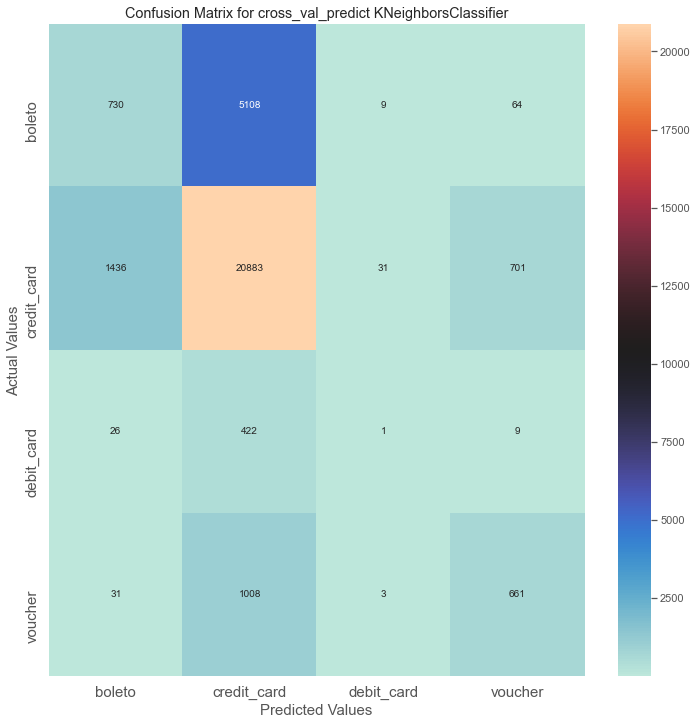

In [48]:
# plot predictions
from sklearn.model_selection import cross_val_predict

#using the n_neighbors and weights we deteremined work best above
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean', n_jobs=-1)

# make predictions
yhat = cross_val_predict(knn, X_test_feats, y_test_num, cv=10)
score = f1_score(y_test_num, yhat, average=None)

#create confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/tutorial/color_palettes.html

### sites about formatting strings in python ###
# https://pyformat.info/
# https://fmt.dev/latest/syntax.html#grammar-token-int_type

from sklearn import metrics as mt

labels = ['boleto','credit_card','debit_card','voucher']
conf = mt.confusion_matrix(le.inverse_transform(y_test_num), le.inverse_transform(yhat), labels=labels)
print('F_measure: %s' %(score))
# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(conf, annot=True, fmt='g', ax=ax, cmap='icefire') 
# annot = put data in cell; fmt = how to format the in-chart labels; cmap = color

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_predict KNeighborsClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()


#### <span style='color:blue'> **KNearestClassifier score_val_predict Chart Interpretation:** </span>
This heatmap shows us the true positive and false positive results from running the 10-fold cross validation using KNN on our reduced features dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (20,883 TP/ 23,051 actual)and debit cards are the least used with similar results (1 TP/ 458 actual). It also makes sense the model keeps trying to classify everything as a credit card since credit cards make up 74% of the payment method for the test set while debite cards are only 1.5% of the test set payment types.  

Now we will actually fit the model using the parameters established above and revisit our heatmap for a final analysis


In [30]:
print(pd.DataFrame(le.inverse_transform(y_test_num)).value_counts())
print('\n======== Let\'s look at these are percentages of the whole test set ========\n')
print('CC: %s' % ('{:.1%}'.format(pd.DataFrame(le.inverse_transform(y_test_num)).value_counts()[0]/X_test_feats.shape[0])))
print('B: %s' % ('{:.1%}'.format(pd.DataFrame(le.inverse_transform(y_test_num)).value_counts()[1]/X_test_feats.shape[0])))
print('V: %s' %('{:.1%}'.format(pd.DataFrame(le.inverse_transform(y_test_num)).value_counts()[2]/X_test_feats.shape[0])))
print('DC: %s' % ('{:.1%}'.format(pd.DataFrame(le.inverse_transform(y_test_num)).value_counts()[3]/X_test_feats.shape[0])))

credit_card    23051
boleto          5911
voucher         1703
debit_card       458
dtype: int64

======== Let's look at these are percentages of the whole test set ========

CC: 74.1%
B: 19.0%
V: 5.5%
DC: 1.5%


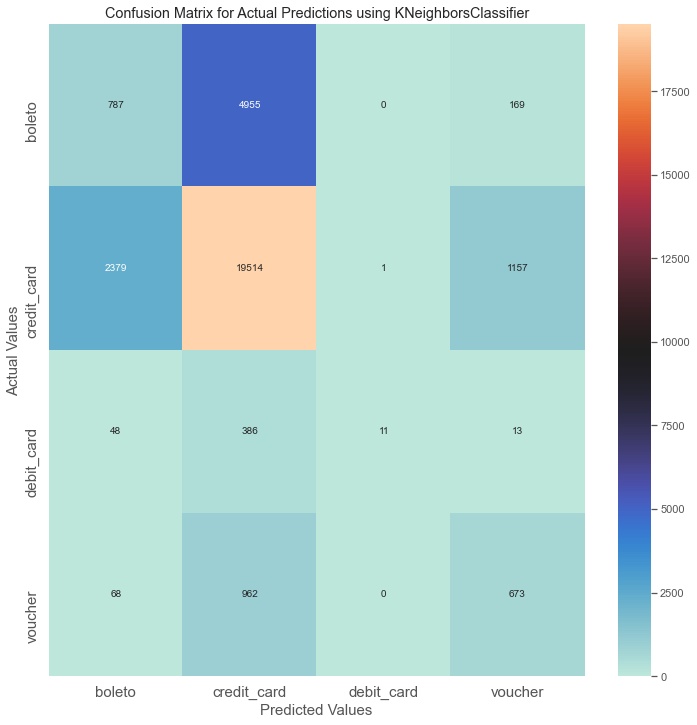

  payment_type  f1_measure
0       boleto        0.17
1  credit_card        0.80
2   debit_card        0.05
3      voucher        0.36


In [59]:
# fit the model and predict
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(X_train_feats, y_train_num)
yhat_knn = knn.predict(X_test_feats)
f1_knn = f1_score(y_test_num, yhat_knn, average=None)
#print(f1_knn)

labels = ['boleto','credit_card','debit_card','voucher']
conf = mt.confusion_matrix(le.inverse_transform(y_test_num), le.inverse_transform(yhat_knn), labels=labels)

# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(conf, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for Actual Predictions using KNeighborsClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()


fmeasure_knn = pd.DataFrame({'payment_type':labels,
                         'f1_measure': f1_knn})
print(fmeasure_knn)

#### <span style='color:blue'> **KNearestClassifier Predicted Chart Interpretation:** </span>
This heatmap shows us the true positive and false positive results from running the predictions using KNN on our reduced features dataset. The diagonal numbers from the top-left to the bottom-right represent the true positive results using the predict function from cross_val_predict and a test set that was never shown to the model because it was held out prior to any pre-processing, but the pre-processing was replicated to ensure the test set was shaped the same as the training set.

Intuitively credit cards are the most widely used payment source, so it makes sense that they have the highest true positive matches (19,514 TP/ 23,051 actual) - note this is down from the CV above, and debit cards are the least used with similar results (11 TP/ 458 actual) and this improved from the cross_val_predict above. It also makes sense the model keeps trying to classify everything as a credit card since credit cards make up 74% of the payment method for the test set while debite cards are only 1.5% of the test set payment types.  

Further we can use our f_measures that shows the relationship between the precision and the recall for each predicted class. Here we see that the KNN model really struggles identifying minority classes, while having a really nice 80% balance for the majority class - credit cards.

### <span style='color:blue'>Model Selection Naive Bayes with reduced features using Cross Validation</span>
https://scikit-learn.org/stable/modules/classes.html?highlight=bayes#module-sklearn.naive_bayes

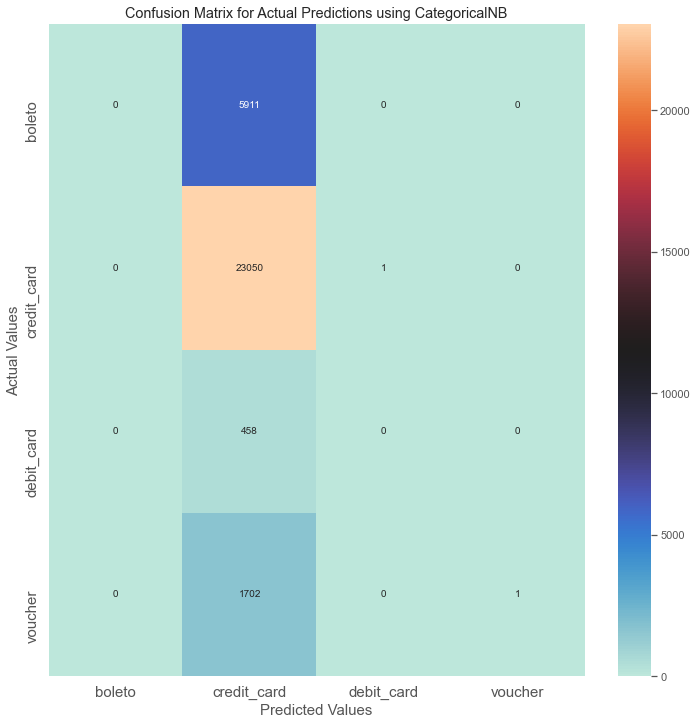

  payment_type  f1_measure
0       boleto        0.00
1  credit_card        0.85
2   debit_card        0.00
3      voucher        0.00


In [63]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# got ValueError: Negative values in data passed to CategoricalNB (input X)
# from online research, it was suggest to try to use MinMaxScaler() to preprocess train/test data so its between 0.1
# https://stackoverflow.com/questions/67224279/how-can-i-resolve-this-error-valueerror-negative-values-in-data-passed-to-m

scl = MinMaxScaler()
train_nb = scl.fit_transform(X_train_feats)
test_nb = scl.fit_transform(X_test_feats)


# naive bayes using cv
nb = CategoricalNB(alpha = 1.0, fit_prior=True)

# fit model
nb.fit(train_nb, y_train_num)
yhat_nb = nb.predict(test_nb)

f1_nb = f1_score(y_test_num, yhat_nb, average=None)


labels = ['boleto','credit_card','debit_card','voucher']
conf_nb = mt.confusion_matrix(le.inverse_transform(y_test_num), le.inverse_transform(yhat_nb), labels=labels)

# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(conf_nb, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for Actual Predictions using CategoricalNB')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_nb = pd.DataFrame({'payment_type':labels,
                         'f1_measure': f1_nb})
print(fmeasure_nb)

#### <span style='color:blue'> **CategoricalNB Predicted Chart Interpretation:** </span>
NB in general does not have much in terms of paramter tuning, so it triggers errors when you try to run it with cross_val_score.
From my understanding of NB, the algorith assumes there is independence among the features and while we did our best to root out the highly correlated attributes, there is still some dependence among them. This particular model is fairly useless for our cases here.

### <span style='color:blue'>Model Selection Random Forest with reduced features using Cross Validation</span>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#

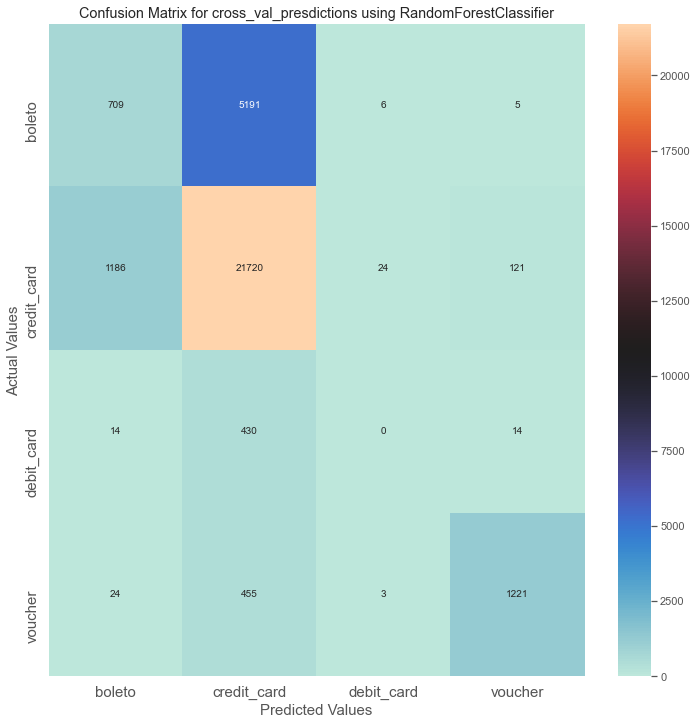

  payment_type  f1_measure
0       boleto        0.18
1  credit_card        0.85
2   debit_card        0.00
3      voucher        0.80


In [68]:
from sklearn.ensemble import RandomForestClassifier

# keep in mind our data was preprocessed and scaled for previous tests!

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train_feats, y_train_num)
yhat_rfc = cross_val_predict(rfc,X_test_feats,y_test_num, cv=10)

f1_rfc = f1_score(y_test_num, yhat_rfc, average=None)


labels = ['boleto','credit_card','debit_card','voucher']
conf_rfc = mt.confusion_matrix(le.inverse_transform(y_test_num), le.inverse_transform(yhat_rfc), labels=labels)

# plot results in a heatmap
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(conf_rfc, annot=True, fmt='g', ax=ax, cmap='icefire')

ax.set_xlabel('Predicted Values', size=15)
ax.set_ylabel('Actual Values', size=15)
ax.set_title('Confusion Matrix for cross_val_presdictions using RandomForestClassifier')
ax.xaxis.set_ticklabels(labels, size=15)
ax.yaxis.set_ticklabels(labels, size=15)
plt.show()

fmeasure_rfc = pd.DataFrame({'payment_type':labels,
                         'f1_measure': f1_rfc})
print(fmeasure_rfc)

### <span style='color:blue'>Model Selection Random Forest with reduced features tuned with GridSearch</span>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV


# code adopted from:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
rfc = RandomForestClassifier(random_state=42)

parameters = {'n_estimators':[100,150,200]},
              #'criterion':['gini','entropy'],
              #'min_samples_split' : [2,10,25],
              #'min_samples_leaf': [1,5,10],
              #'max_features': [2,3,5]}
   

gs = GridSearchCV(rfc, param_grid = parameters, cv=10)

gs.fit(X_train_feats, y_train_num)

sorted(gs.cv_results_,keys())


NameError: name 'keys' is not defined

In [99]:
gs.best_params_

{'n_estimators': 150}

In [96]:
gs.cv_results

AttributeError: 'GridSearchCV' object has no attribute 'cv_results'

# Deployment (5 points total)
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
* One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

In [ ]:
# check results
grid_search.best_params_